In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
baseline_data = pd.read_csv('Final BASELINE-table.csv' , skiprows=6)
experiment_data = pd.read_csv('Final ExperimentBASIC-table.csv' , skiprows=6)

In [3]:
baseline_data.head(3)

,[run number],Technology,Separation-at-home,nmbr-weeks-pickup-pmd,general-regionbin-size,number-of-households,nmbr-weeks-pickup-gen,pmd-regionbin-size,[step],recycle-ratio,mean [bin-satisfaction] of households,average-r
0,1,Basic,False,2,100,26,1,200,0,0.0,0.800000,1.607692
1,1,Basic,False,2,100,26,1,200,1,0.0,0.800000,1.607692
2,1,Basic,False,2,100,26,1,200,2,0.0,0.775385,1.607692


In [4]:
baseline_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199872 entries, 0 to 199871
Data columns (total 12 columns):
 #   Column                                 Non-Null Count   Dtype  
---  ------                                 --------------   -----  
 0   [run number]                           199872 non-null  int64  
 1   Technology                             199872 non-null  object 
 2   Separation-at-home                     199872 non-null  bool   
 3   nmbr-weeks-pickup-pmd                  199872 non-null  int64  
 4   general-regionbin-size                 199872 non-null  int64  
 5   number-of-households                   199872 non-null  int64  
 6   nmbr-weeks-pickup-gen                  199872 non-null  int64  
 7   pmd-regionbin-size                     199872 non-null  int64  
 8   [step]                                 199872 non-null  int64  
 9   recycle-ratio                          199872 non-null  float64
 10  mean [bin-satisfaction] of households  199872 non-null  

In [5]:
baseline_data.rename(columns={'[run number]':'run_number','[step]':'tick' , 'mean [bin-satisfaction] of households': 'avg bin-satisfaction'}, inplace=True)
experiment_data.rename(columns={'[run number]':'run_number','[step]':'tick' , 'mean [bin-satisfaction] of households': 'avg bin-satisfaction'}, inplace=True)

In [6]:
experiment_data = experiment_data[experiment_data['recycle-ratio'] != 0]

In [7]:
#maximum average waste production ratio of the households
baseline_data['average-r'].max()

1.7730769230769232

In [8]:
#minimum average waste production ratio of the households
baseline_data['average-r'].min()

1.3192307692307692

<AxesSubplot:xlabel='tick', ylabel='avg bin-satisfaction'>

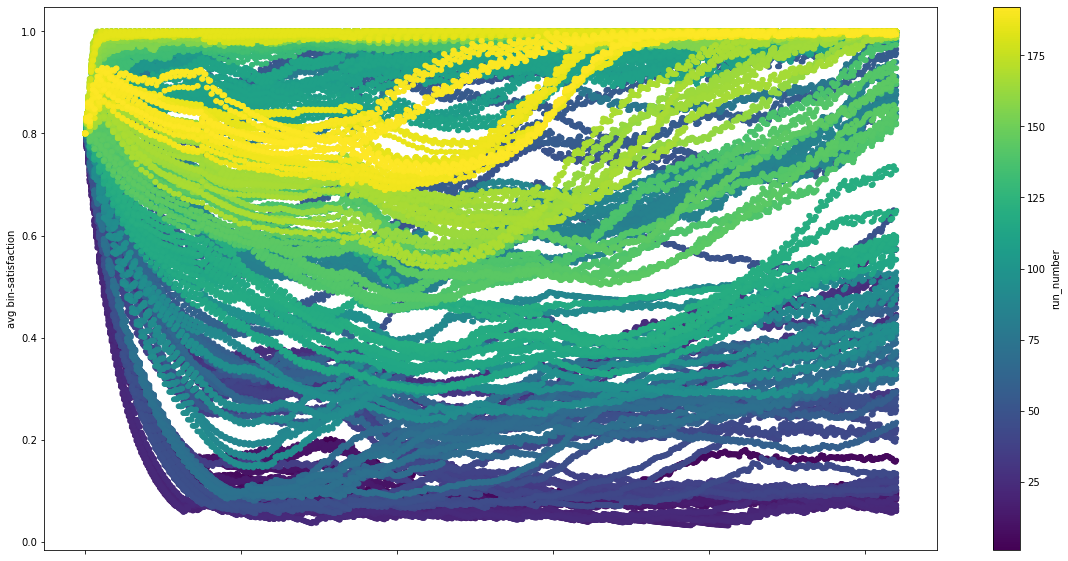

In [9]:
baseline_data.plot.scatter(x='tick',y='avg bin-satisfaction',c='run_number',colormap='viridis',figsize=(20,10))

Text(0.5, 0, 'avg bin-satisfaction')

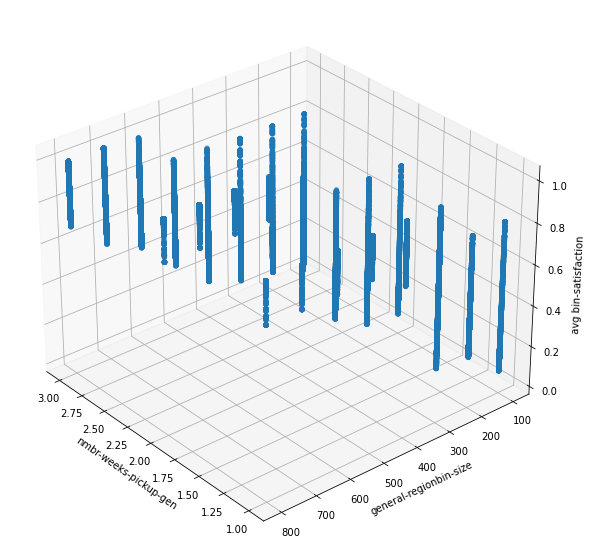

In [10]:
threedp_plot = plt.figure(figsize=(10,10)).gca(projection='3d')
threedp_plot.scatter(baseline_data['nmbr-weeks-pickup-gen'],baseline_data['general-regionbin-size'], baseline_data['avg bin-satisfaction'])
threedp_plot.view_init(30,140)
threedp_plot.set_xlabel('nmbr-weeks-pickup-gen')
threedp_plot.set_ylabel('general-regionbin-size')
threedp_plot.set_zlabel('avg bin-satisfaction')

<AxesSubplot:xlabel='tick', ylabel='avg bin-satisfaction'>

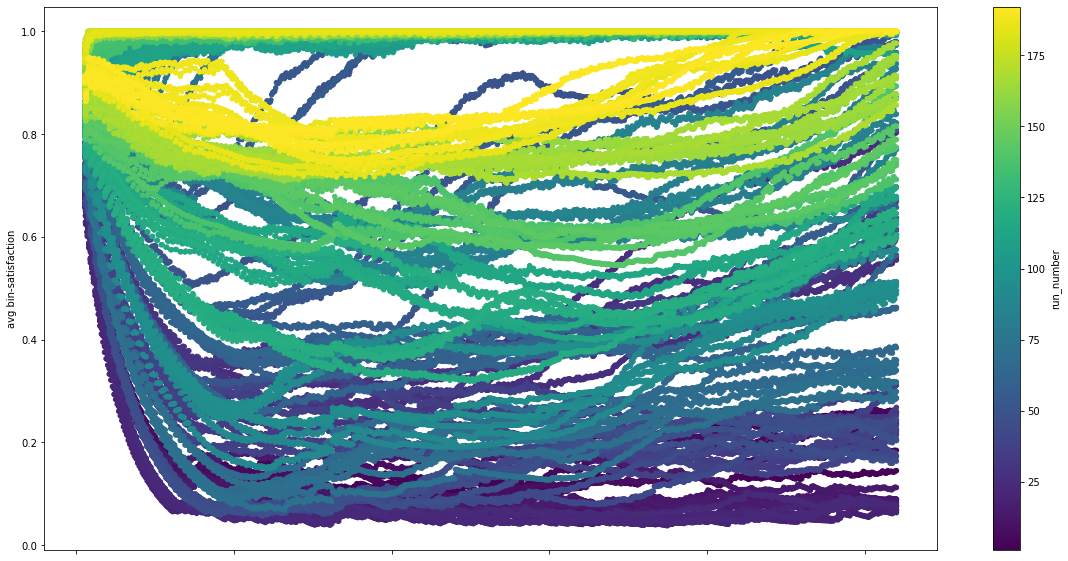

In [11]:
experiment_data.plot.scatter(x='tick',y='avg bin-satisfaction',c='run_number',colormap='viridis',figsize=(20,10))

Text(0.5, 0, 'recycle-ratio')

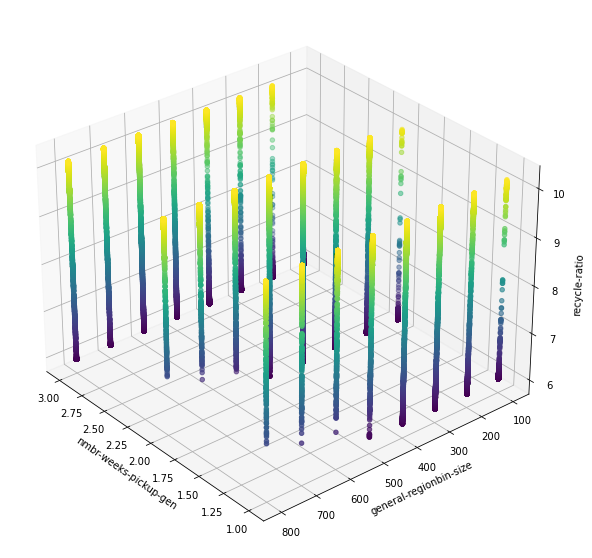

In [12]:
exp_3d_plot = plt.figure(figsize=(10,10)).gca(projection='3d')
exp_3d_plot.scatter(experiment_data['nmbr-weeks-pickup-gen'], experiment_data['general-regionbin-size'],experiment_data['recycle-ratio'], c=experiment_data['recycle-ratio'])
exp_3d_plot.view_init(30,140)
exp_3d_plot.set_xlabel('nmbr-weeks-pickup-gen')
exp_3d_plot.set_ylabel('general-regionbin-size')
exp_3d_plot.set_zlabel('recycle-ratio')

In [13]:
experiment1_pick1 = experiment_data[experiment_data['nmbr-weeks-pickup-gen'] != 1]
experiment1_pick2 = experiment_data[experiment_data['nmbr-weeks-pickup-gen'] != 2]
experiment1_pick3 = experiment_data[experiment_data['nmbr-weeks-pickup-gen'] != 3]

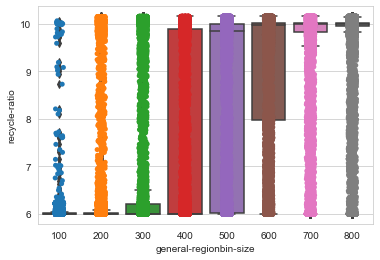

In [17]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=experiment1_pick1)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=experiment1_pick1)

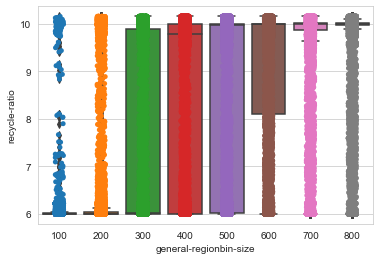

In [21]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=experiment1_pick2)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=experiment1_pick2)

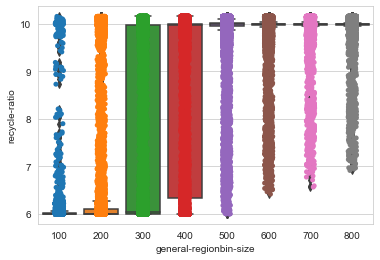

In [24]:
sns.set_style('whitegrid')
ax= sns.boxplot(x='general-regionbin-size',y='recycle-ratio',data=experiment1_pick3)
ax = sns.stripplot(x="general-regionbin-size", y='recycle-ratio',data=experiment1_pick3)